In [1]:
library(gplots)
library(tidyverse)
library(reshape2)
library(ggplot2)
library(gridExtra)
#install.packages('ggExtra')
library(ggExtra)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.3
✔ tibble  3.0.3     ✔ dplyr   0.8.3
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




,X,G56682BC,G65562ZE,G53168IY,G33734YD,G10609HO,G63640QH,G84852GW,G58667NI,G59576IJ,⋯,G71527NE,G12436UO,G16774YZ,G74859XI,G53604QR,G57835AK,G90542MP,G38946SH,G56501FP,iupac
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0,0.00000000,0.00000000,0.00000000,0.6925373,0.00000000,0.00000000,0.3641791,0.6477612,0.02089552,⋯,0.08358209,0.03880597,0.02089552,0.005970149,0.000000000,0.002985075,0.005970149,0.002985075,0.002985075,a-L-Fucp
2,1,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,b-D-Galp3S
3,2,0.00000000,0.00000000,0.04387569,0.4241316,0.02193784,0.01462523,0.2230347,0.3967093,0.01279707,⋯,0.05118830,0.02376600,0.01279707,0.003656307,0.003656307,0.001828154,0.003656307,0.001828154,0.001828154,b-D-Glcp2NAc
4,3,0.00000000,0.00000000,0.04502814,0.4352720,0.02251407,0.01500938,0.2288931,0.4071295,0.01313321,⋯,0.05253283,0.02439024,0.01313321,0.003752345,0.003752345,0.001876173,0.003752345,0.001876173,0.001876173,a-D-Manp
5,4,0.00000000,0.00000000,0.04485981,0.4336449,0.02242991,0.01495327,0.2280374,0.4056075,0.01308411,⋯,0.05233645,0.02429907,0.01308411,0.003738318,0.003738318,0.001869159,0.003738318,0.001869159,0.001869159,b-D-Manp
6,5,0.01694915,0.03728814,0.00000000,0.0000000,0.00000000,0.00000000,0.4135593,0.0000000,0.02372881,⋯,0.09491525,0.00000000,0.02372881,0.006779661,0.006779661,0.003389831,0.006779661,0.003389831,0.003389831,?-D-Neup5NAc


Saving 6.67 x 6.67 in image



0%  25%  50%  75% 100% 
   1    1    3    7  962

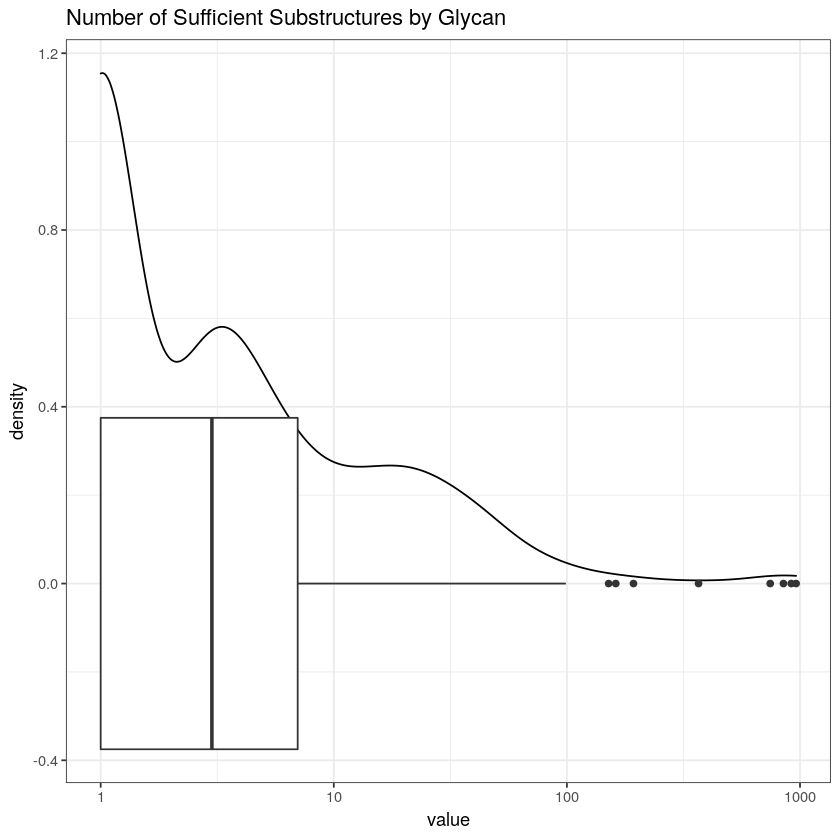

0%  25%  50%  75% 100% 
   1   47   75  152 1363

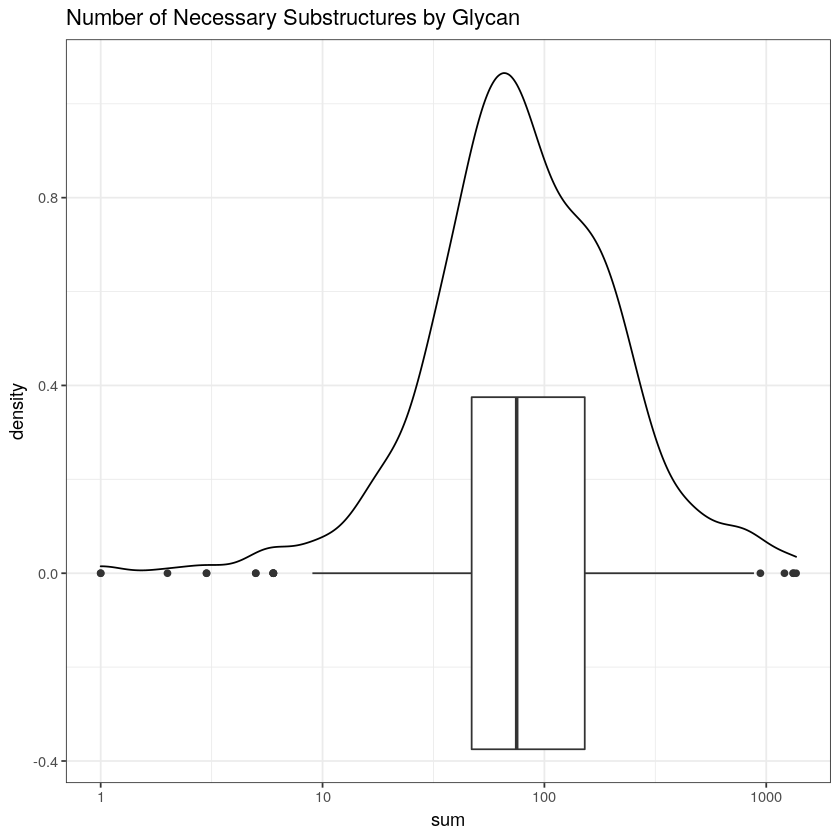

In [10]:
r = read.csv('../results//substruct_condition.linkAmiguous.csv')
head(r)

m=melt(apply(data.matrix(r[,-c(1,ncol(r))]),2,function(x) table(cut(x,breaks = c(0,.25,.5,.75,1-1e-3,1)))))

m_tmp = m %>% group_by(Var2) %>% mutate(sum=sum(value))
#head(m_tmp)
g=ggplot(m_tmp[m_tmp$Var1=='(0.999,1]',],aes(x=sum,y=value+.01))+geom_point()+#ylim(1,1200)+
    geom_abline()+theme_bw(base_size = 20)+
    scale_x_log10()+scale_y_log10(lim=c(1,1200))+#stat_smooth(method='lm')+
    xlab("Necessary Substructures")+ylab("Sufficient Substructures")+
    ggtitle('Necessary and Sufficient\nSubstructures by Glycan')
#ggMarginal(g,type = 'densigram',fill='white')
g=ggMarginal(g,type = 'boxplot',fill='white')
ggsave(g,filename = '../results//substruct_condition.linkAmbi.pdf')

ggplot(m_tmp[m_tmp$Var1=='(0.999,1]',],aes(x=value))+
    geom_density()+
    geom_boxplot()+theme_bw()+
    scale_x_log10()+ggtitle('Number of Sufficient Substructures by Glycan')
# #hist(m_tmp$sum)
quantile(m_tmp$value[m_tmp$Var1=='(0.999,1]'])

# number of necessary structures
m_tmp = m %>% group_by(Var2) %>% summarize(sum=sum(value))
ggplot(m_tmp,aes(x=sum))+
    geom_density()+
    geom_boxplot()+theme_bw()+
    scale_x_log10()+ggtitle('Number of Necessary Substructures by Glycan')
#hist(m_tmp$sum)
quantile(m_tmp$sum)


In [ ]:
r = read.csv('../results//substruct_condition.linkSpecific.csv')
head(r)

m=melt(apply(data.matrix(r[,-c(1,ncol(r))]),2,function(x) table(cut(x,breaks = c(0,.25,.5,.75,1-1e-3,1)))))

m_tmp = m %>% group_by(Var2) %>% mutate(sum=sum(value))
#head(m_tmp)
g=ggplot(m_tmp[m_tmp$Var1=='(0.999,1]',],aes(x=sum,y=value+.01))+geom_point()+#ylim(1,1200)+
    geom_abline()+theme_bw(base_size = 20)+
    scale_x_log10()+scale_y_log10(lim=c(1,1200))+#stat_smooth(method='lm')+
    xlab("Necessary Substructures")+ylab("Sufficient Substructures")+
    ggtitle('Necessary and Sufficient\nSubstructures by Glycan')
#ggMarginal(g,type = 'densigram',fill='white')
g=ggMarginal(g,type = 'boxplot',fill='white')
ggsave(g,filename = '../results//substruct_condition.linkSepc.pdf')

ggplot(m_tmp[m_tmp$Var1=='(0.999,1]',],aes(x=value))+
    geom_density()+
    geom_boxplot()+theme_bw()+
    scale_x_log10()+ggtitle('Number of Sufficient Substructures by Glycan')
# #hist(m_tmp$sum)
quantile(m_tmp$value[m_tmp$Var1=='(0.999,1]'])

# number of necessary structures
m_tmp = m %>% group_by(Var2) %>% summarize(sum=sum(value))
ggplot(m_tmp,aes(x=sum))+
    geom_density()+
    geom_boxplot()+theme_bw()+
    scale_x_log10()+ggtitle('Number of Necessary Substructures by Glycan')
#hist(m_tmp$sum)
quantile(m_tmp$sum)


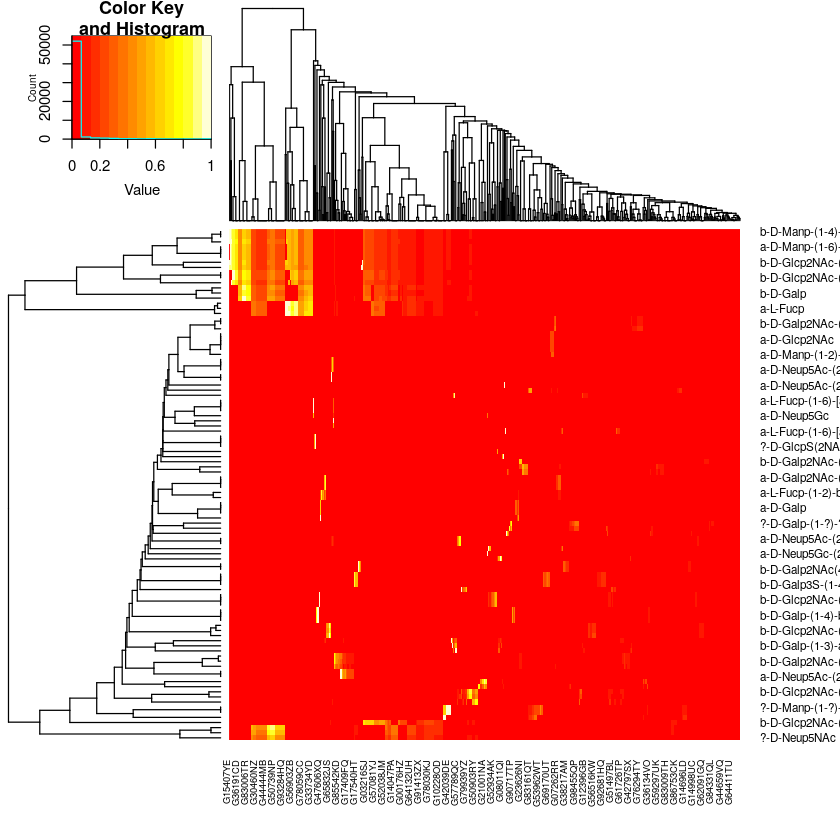

In [3]:
heatmap.2(data.matrix(r[1:100,-c(1,ncol(r))]),trace='none',labRow = r$iupac)

In [4]:
head(r)

,X,G56682BC,G65562ZE,G53168IY,G33734YD,G10609HO,G63640QH,G84852GW,G58667NI,G59576IJ,⋯,G71527NE,G12436UO,G16774YZ,G74859XI,G53604QR,G57835AK,G90542MP,G38946SH,G56501FP,iupac
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0,0.00000000,0.00000000,0.00000000,0.6925373,0.00000000,0.00000000,0.3641791,0.6477612,0.02089552,⋯,0.08358209,0.03880597,0.02089552,0.005970149,0.000000000,0.002985075,0.005970149,0.002985075,0.002985075,a-L-Fucp
2,1,0.00000000,0.00000000,0.00000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000,⋯,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,b-D-Galp3S
3,2,0.00000000,0.00000000,0.04387569,0.4241316,0.02193784,0.01462523,0.2230347,0.3967093,0.01279707,⋯,0.05118830,0.02376600,0.01279707,0.003656307,0.003656307,0.001828154,0.003656307,0.001828154,0.001828154,b-D-Glcp2NAc
4,3,0.00000000,0.00000000,0.04502814,0.4352720,0.02251407,0.01500938,0.2288931,0.4071295,0.01313321,⋯,0.05253283,0.02439024,0.01313321,0.003752345,0.003752345,0.001876173,0.003752345,0.001876173,0.001876173,a-D-Manp
5,4,0.00000000,0.00000000,0.04485981,0.4336449,0.02242991,0.01495327,0.2280374,0.4056075,0.01308411,⋯,0.05233645,0.02429907,0.01308411,0.003738318,0.003738318,0.001869159,0.003738318,0.001869159,0.001869159,b-D-Manp
6,5,0.01694915,0.03728814,0.00000000,0.0000000,0.00000000,0.00000000,0.4135593,0.0000000,0.02372881,⋯,0.09491525,0.00000000,0.02372881,0.006779661,0.006779661,0.003389831,0.006779661,0.003389831,0.003389831,?-D-Neup5NAc


,Var1,Var2,value
,<fct>,<fct>,<int>
1,"(0,0.25]",G56682BC,4
2,"(0.25,0.5]",G56682BC,0
3,"(0.5,0.75]",G56682BC,0
4,"(0.75,0.999]",G56682BC,1
5,"(0.999,1]",G56682BC,1
6,"(0,0.25]",G65562ZE,3


TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]

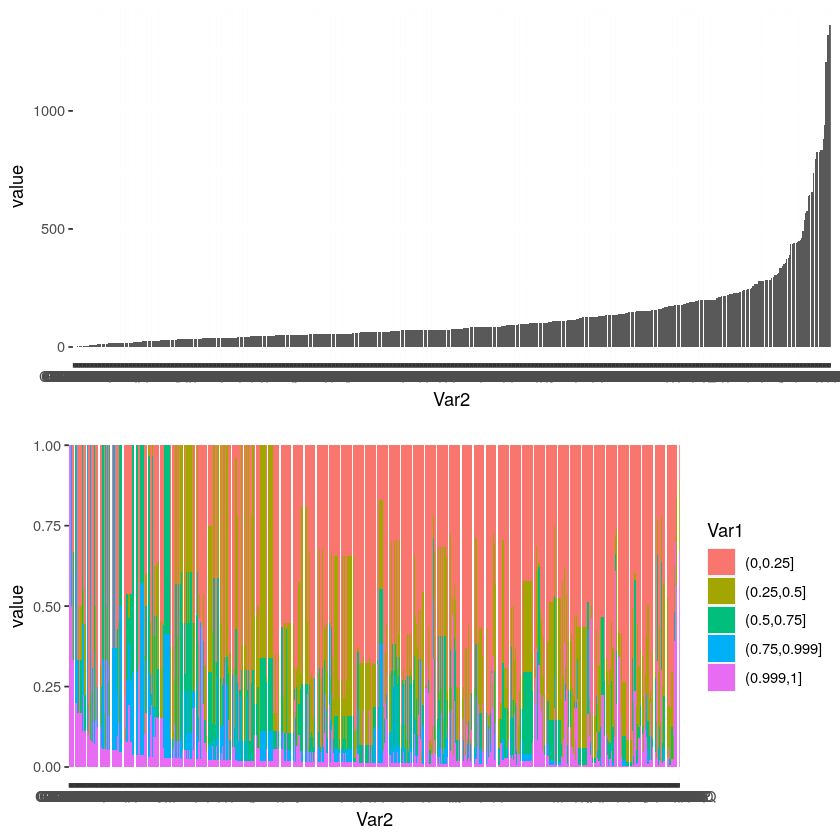

In [5]:
m=melt(apply(data.matrix(r[,-c(1,ncol(r))]),2,function(x) table(cut(x,breaks = c(0,.25,.5,.75,1-1e-3,1)))))
head(m)
             
m$Var2 = fct_reorder(m$Var2, m$value, .fun='sum' )
g1=ggplot(m,aes(x=Var2,y=value))+geom_bar( stat="identity")#+scale_y_log10()
 
#tmp = ifelse(m$Var1=='(0.999,1]',m$value,0)
#m$Var2 = fct_reorder(m$Var2, tmp, .fun='sum' )
g2=ggplot(m,aes(x=Var2,y=value,fill=Var1))+geom_bar(position="fill", stat="identity")
             
g=grid.arrange(grobs=list(g1,g2),ncol=1)    
g

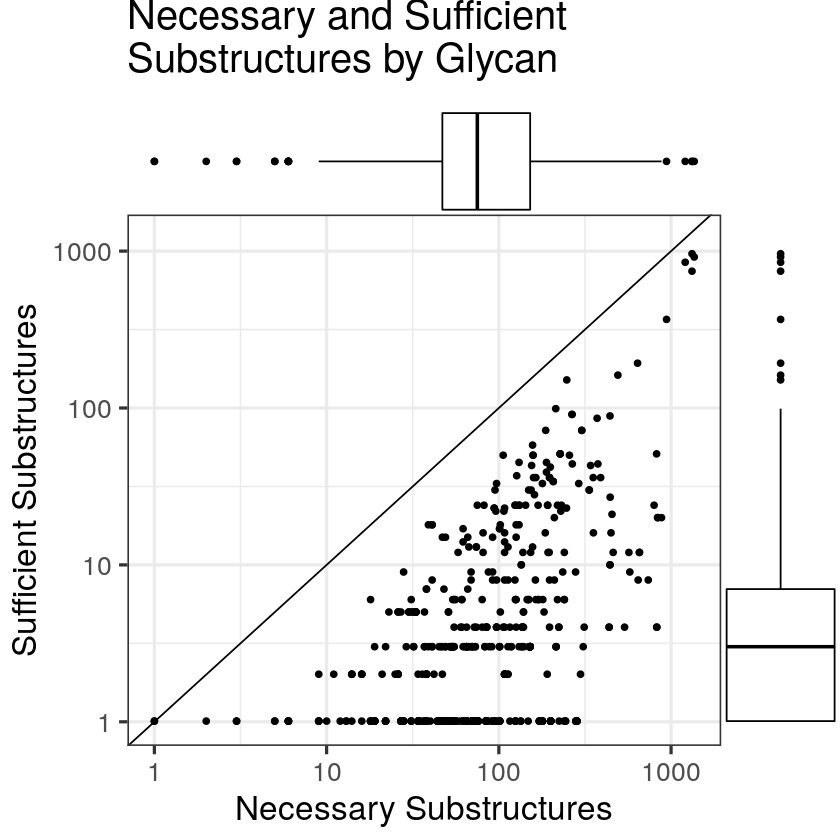

0%  25%  50%  75% 100% 
   1    1    3    7  962

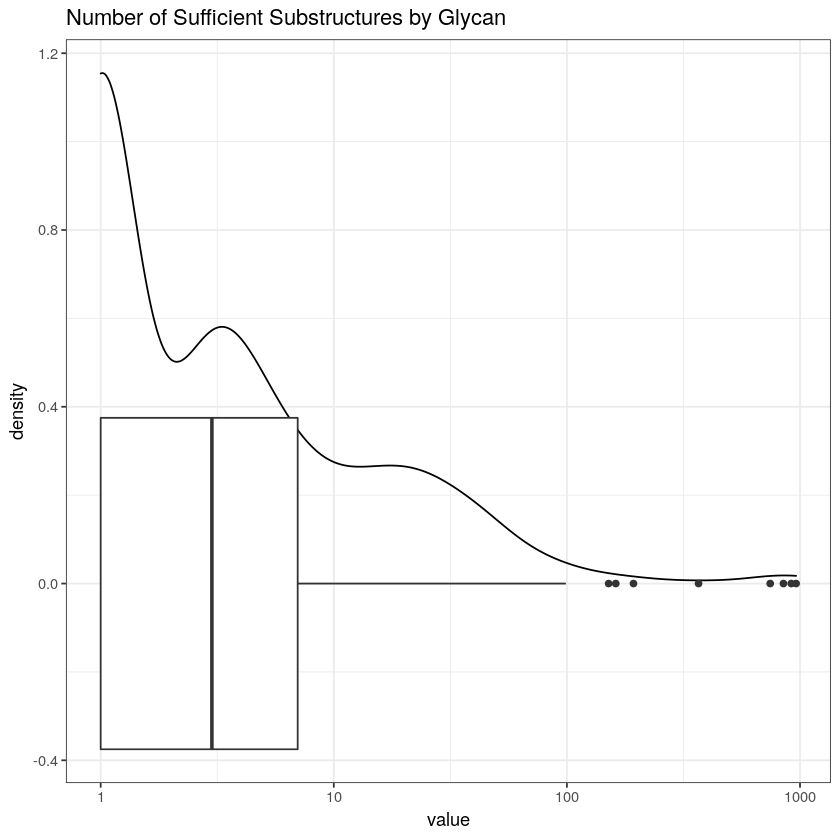

0%  25%  50%  75% 100% 
   1   47   75  152 1363

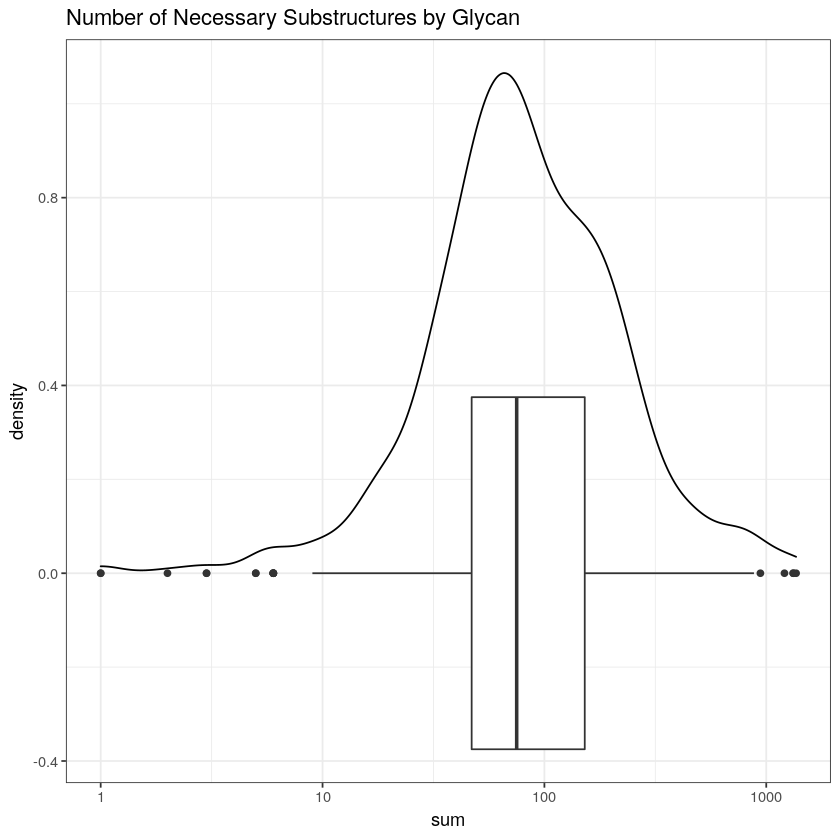

In [6]:
m=melt(apply(data.matrix(r[,-c(1,ncol(r))]),2,function(x) table(cut(x,breaks = c(0,.25,.5,.75,1-1e-3,1)))))

m_tmp = m %>% group_by(Var2) %>% mutate(sum=sum(value))
#head(m_tmp)
g=ggplot(m_tmp[m_tmp$Var1=='(0.999,1]',],aes(x=sum,y=value+.01))+geom_point()+#ylim(1,1200)+
    geom_abline()+theme_bw(base_size = 20)+
    scale_x_log10()+scale_y_log10(lim=c(1,1200))+#stat_smooth(method='lm')+
    xlab("Necessary Substructures")+ylab("Sufficient Substructures")+
    ggtitle('Necessary and Sufficient\nSubstructures by Glycan')
#ggMarginal(g,type = 'densigram',fill='white')
g=ggMarginal(g,type = 'boxplot',fill='white')
ggsave(g,filename = '../results//substruct_condition.xlsx')

ggplot(m_tmp[m_tmp$Var1=='(0.999,1]',],aes(x=value))+
    geom_density()+
    geom_boxplot()+theme_bw()+
    scale_x_log10()+ggtitle('Number of Sufficient Substructures by Glycan')
# #hist(m_tmp$sum)
quantile(m_tmp$value[m_tmp$Var1=='(0.999,1]'])

# number of necessary structures
m_tmp = m %>% group_by(Var2) %>% summarize(sum=sum(value))
ggplot(m_tmp,aes(x=sum))+
    geom_density()+
    geom_boxplot()+theme_bw()+
    scale_x_log10()+ggtitle('Number of Necessary Substructures by Glycan')
#hist(m_tmp$sum)
quantile(m_tmp$sum)


In [8]:
library(reticulate)
glypy <- import('glypy')
table(unlist(lapply(glypy$io$iupac$loads(r$iupac[100])$index,glypy$io$iupac$dumps)))

# motif_vector = as.character(r$iupac)
# ms_comp=as.data.frame(do.call(rbind,lapply(1:length(motif_vector),function(i) cbind(motif=motif_vector[i],ms=unlist(lapply(glypy$io$iupac$loads(motif_vector[i])$index,function(x) try(glypy$io$iupac$dumps(x))))))))
# motif_ms_occurance=with(ms_comp,table(motif,ms))
# head(motif_ms_occurance)


    ?-D-Galp b-D-Glcp2NAc 
           1            2 

In [9]:
glypy$plot$plot(glypy$io$iupac$loads(r$iupac[100]))

[[1]]
RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=1  x=3.061616997868383e-17 mod=0

[[2]]
AxesSubplot(0.125,0.11;0.775x0.77)
